In [1]:
# Downloading the data

import numpy as np
import pandas as pd
import yfinance as yf
import warnings


warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2024-01-01'
end = '2024-12-30'

# Tickers of assets
assets = asset_classes= pd.read_csv("asset_classes10X402.csv").sort_values(by = ["Assets"])

assets = list(asset_classes["Assets"])


# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close')]
data.columns = assets

[*********************100%***********************]  41 of 41 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,ABG.JO,ADH.JO,AMS.JO,APN.JO,ARI.JO,AVI.JO,BAW.JO,CLS.JO,DRD.JO,DSY.JO,...,RNI.JO,SAP.JO,SOL.JO,SPP.JO,SSW.JO,TBS.JO,TFG.JO,TRU.JO,VOD.JO,WHL.JO
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03 00:00:00+00:00,-2.4064%,-1.0433%,-6.9310%,0.7006%,-3.1990%,-1.3454%,-1.6814%,-2.4938%,-3.0421%,-1.0213%,...,-2.2595%,1.1348%,-0.3884%,-0.8307%,-4.6371%,-0.7745%,-1.2941%,-1.5021%,-0.7223%,-1.4471%
2024-01-04 00:00:00+00:00,-0.5578%,0.3650%,-2.2584%,0.6612%,0.9610%,-0.1720%,-0.0928%,-0.9243%,-0.3338%,-1.1025%,...,0.2769%,2.1754%,1.0434%,-0.3282%,-1.0571%,0.0550%,-0.4845%,-3.0223%,-0.7843%,-1.8213%
2024-01-05 00:00:00+00:00,0.7267%,-1.4545%,2.2151%,-1.6078%,0.4706%,-0.5415%,0.3317%,-0.4792%,-1.5405%,-0.0214%,...,-0.8349%,-0.8292%,0.6956%,0.2686%,2.1368%,0.2751%,0.3246%,1.2009%,0.5714%,0.9203%
2024-01-08 00:00:00+00:00,-0.4177%,0.4920%,-2.1465%,0.6427%,-2.0789%,0.5569%,-0.3968%,2.1124%,-3.3333%,-0.1287%,...,-0.5547%,2.2147%,-3.1358%,2.5058%,-2.6778%,0.6832%,1.4844%,0.6922%,0.4830%,0.5130%
2024-01-09 00:00:00+00:00,1.2011%,6.0792%,-0.7898%,0.2426%,-0.3332%,-0.0861%,1.8988%,-1.0878%,-0.0704%,-0.8302%,...,-0.6667%,1.4592%,1.1033%,-0.3288%,1.3328%,0.0743%,-0.0375%,1.9360%,-1.0084%,0.3544%


In [3]:
asset_classes = pd.DataFrame(assets)

views = pd.read_csv("views10XBL.csv")

views = pd.DataFrame(views.T)
# print(asset_classes)
print(views)



                   0       1       2       3       4       5       6       7   \
Disabled        False   False   False   False   False   False   False   False   
Type           Assets  Assets  Assets  Assets  Assets  Assets  Assets  Assets   
Set               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Position       ABG.JO  INL.JO  NED.JO  SOL.JO  ADH.JO  AVI.JO  TBS.JO  MNP.JO   
Sign               <=      <=      <=      <=      <=      <=      <=      <=   
Weight        1.5111% 1.5111% 1.5111% 3.3669% 1.5111% 2.4390% 2.4390% 2.4390%   
Type Relative     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Relative Set      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Relative          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                   8       9   ...      31      32      33      34      35  \
Disabled        False   False  ...   False   False   False   False   False   
Type           Assets  Assets  ..

In [14]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

port.alpha = 0.05
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ABG.JO,ADH.JO,AMS.JO,APN.JO,ARI.JO,AVI.JO,BAW.JO,CLS.JO,DRD.JO,DSY.JO,...,RNI.JO,SAP.JO,SOL.JO,SPP.JO,SSW.JO,TBS.JO,TFG.JO,TRU.JO,VOD.JO,WHL.JO
weights,0.0000%,4.4240%,0.0000%,0.0000%,0.0000%,0.0000%,5.0549%,0.0000%,0.6024%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,4.0615%,0.0000%,0.0000%,0.0000%,0.0000%


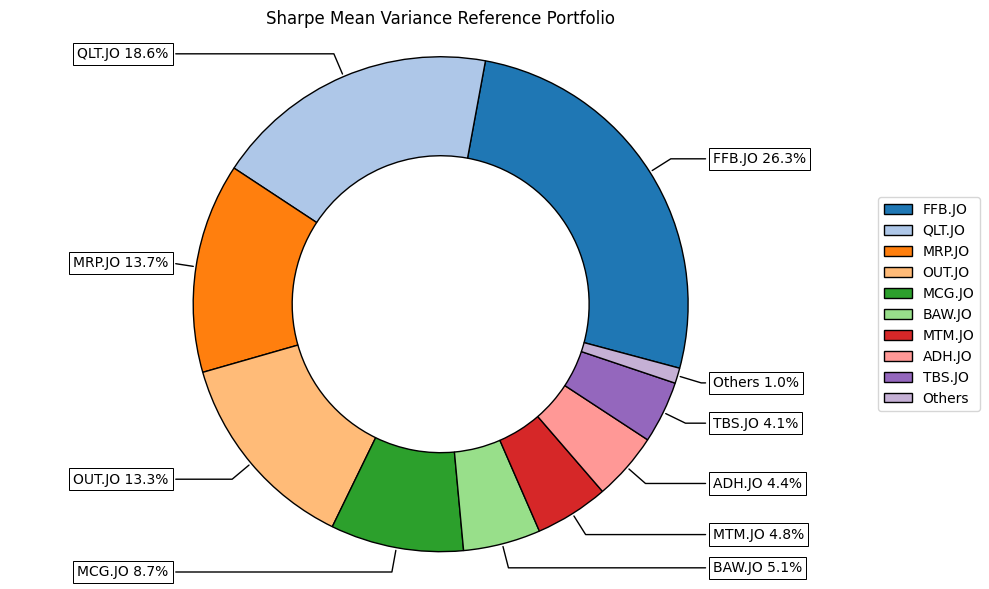

In [6]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance Reference Portfolio', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [7]:
# asset_classes = {'Assets': ['ABG.JO','INL.JO','NED.JO','SOL.JO','ADH.JO','AVI.JO','TBS.JO','BAW.JO',
#                             'MNP.JO','NTC.JO','SAP.JO','ARI.JO','GLN.JO','KIO.JO','QLT.JO','RNI.JO',
#                             'REM.JO','DSY.JO','MTM.JO','OMU.JO','OUT.JO','EXX.JO','CLS.JO','SPP.JO','APN.JO',
#                             'AMS.JO','DRD.JO','IMP.JO','NPH.JO','SSW.JO','FFB.JO','GRT.JO','RDF.JO','RES.JO',
#                             'MTH.JO','MRP.JO','TFG.JO','TRU.JO','WHL.JO','MCG.JO','VOD.JO'], 


                #  'Industry': ['Banks','Banks','Banks','Chemicals','Consumer Services','Food Producers','Food Producers',
                #             'General Industrials','General Industrials','Health Care Providers','Industrial Materials','Industrial Metals and Mining',
                #             'Industrial Metals and Mining','Industrial Metals and Mining','Investment Banking and Brokerage Service',
                #             'Investment Banking and Brokerage Service','Investment Banking and Brokerage Service',
                #             'Life Insurance','Life Insurance','Life Insurance','Non-life Insurance','Oil, Gas and Coal','Personal Care, Drug and Grocery Stores',
                #             'Personal Care, Drug and Grocery Stores','Pharmaceuticals and Biotechnology',
                #             'Precious Metals and Mining','Precious Metals and Mining','Precious Metals and Mining','Precious Metals and Mining','Precious Metals and Mining',
                #             'Real Estate Investment and Services','Real Estate Investment Trusts','Real Estate Investment Trusts','Real Estate Investment Trusts',
                #             'Retailers','Retailers','Retailers','Retailers','Retailers',
                #             'Telecommunications Service Providers','Telecommunications Service Providers']
# }        

# asset_classes = pd.DataFrame(asset_classes)
# asset_classes = asset_classes.sort_values(by=['Assets'])

views = pd.read_csv("views10XBL.csv")
views = pd.DataFrame(views)




# views_new = {'Disabled': [False, False, False,False, False, False,False, False, False,False, False, False,False, False, False,False, False, False,False, False, False,False, False, False,
#                           False, False, False,False, False, False,False, False, False,False, False, False,False, False, False,False, False],
#          'Type': ['Assets', 'Assets', 'Assets','Assets', 'Assets', 'Assets','Assets', 'Assets', 'Assets','Assets', 'Assets', 'Assets','Assets', 'Assets', 'Assets','Assets', 'Assets', 'Assets',
#                   'Assets', 'Assets', 'Assets','Assets', 'Assets', 'Assets','Assets', 'Assets', 'Assets','Assets', 'Assets', 'Assets','Assets', 'Assets', 'Assets','Assets', 'Assets', 'Assets',
#                   'Assets', 'Assets','Assets', 'Assets', 'Assets'],
#          'Set': [],
#          'Position': ['RES.JO', 'WHL.JO', 'FFB.JO','ABG.JO','INL.JO','NED.JO','SOL.JO','ADH.JO','AVI.JO','TBS.JO','BAW.JO',
#                             'MNP.JO','NTC.JO','SAP.JO','ARI.JO','GLN.JO','KIO.JO','QLT.JO','RNI.JO',
#                             'REM.JO','DSY.JO','MTM.JO','OMU.JO','OUT.JO','EXX.JO','CLS.JO','SPP.JO','APN.JO',
#                             'AMS.JO','DRD.JO','IMP.JO','NPH.JO','SSW.JO','FFB.JO','GRT.JO','RDF.JO','RES.JO',
#                             'MTH.JO','MRP.JO','TFG.JO','TRU.JO','WHL.JO','MCG.JO','VOD.JO'],
#          'Sign': ['>=', '>=', '<=','>=', '>=', '>=', '>=', '>=', '>=', '>=', '>=','>=', '>=', '>=', '>=','>=', '>=', '>=', '>=',
#                   '>=', '>=', '>=', '>=','>=', '>=', '>=', '>=','>=', '>=', '>=', '>=','>=', '>=', '>=', '>=','>=', '>=', '>=','>=','>=', '>='],
#          'Weight': [0.08, 0.1, 0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], # Annual terms 
#          'Type Relative': [''],
#          'Relative Set': [''],
#          'Relative': ['']}

views = pd.DataFrame(views)

display(views)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative
0,False,Assets,NaN,ABG.JO,<=,1.5111%,NaN,NaN,NaN
1,False,Assets,NaN,INL.JO,<=,1.5111%,NaN,NaN,NaN
2,False,Assets,NaN,NED.JO,<=,1.5111%,NaN,NaN,NaN
3,False,Assets,NaN,SOL.JO,<=,3.3669%,NaN,NaN,NaN
4,False,Assets,NaN,ADH.JO,<=,1.5111%,NaN,NaN,NaN
5,False,Assets,NaN,AVI.JO,<=,2.4390%,NaN,NaN,NaN
6,False,Assets,NaN,TBS.JO,<=,2.4390%,NaN,NaN,NaN
7,False,Assets,NaN,MNP.JO,<=,2.4390%,NaN,NaN,NaN
8,False,Assets,NaN,NTC.JO,<=,2.4390%,NaN,NaN,NaN
9,False,Assets,NaN,SAP.JO,<=,2.4390%,NaN,NaN,NaN


In [8]:
P, Q = rp.assets_views(views, asset_classes)

# print(P)
# print(Q)

display(pd.DataFrame(P.T))
display(pd.DataFrame(Q))

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,100.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%
1,-0.0000%,-0.0000%,-0.0000%,-0.0000%,100.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%
2,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%
3,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%
4,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%
5,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,100.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%
6,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,100.0000%
7,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%
8,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%
9,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,...,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,-0.0000%,0.0000%,-0.0000%


,0
0,1.5111%
1,1.5111%
2,1.5111%
3,3.3669%
4,1.5111%
5,2.4390%
6,2.4390%
7,2.4390%
8,2.4390%
9,2.4390%


In [9]:
# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/252, rf=0.08/252, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'
rm = 'MV' 
obj = 'Sharpe' # Objective function
hist = False 

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_bl.T)

,ABG.JO,ADH.JO,AMS.JO,APN.JO,ARI.JO,AVI.JO,BAW.JO,CLS.JO,DRD.JO,DSY.JO,...,RNI.JO,SAP.JO,SOL.JO,SPP.JO,SSW.JO,TBS.JO,TFG.JO,TRU.JO,VOD.JO,WHL.JO
weights,0.0000%,4.3919%,0.0000%,0.0000%,0.0000%,0.0000%,5.0437%,0.0000%,2.3779%,0.0000%,...,1.6365%,0.0000%,0.0000%,0.0000%,0.0000%,0.8943%,0.0000%,0.0000%,0.0000%,0.0000%


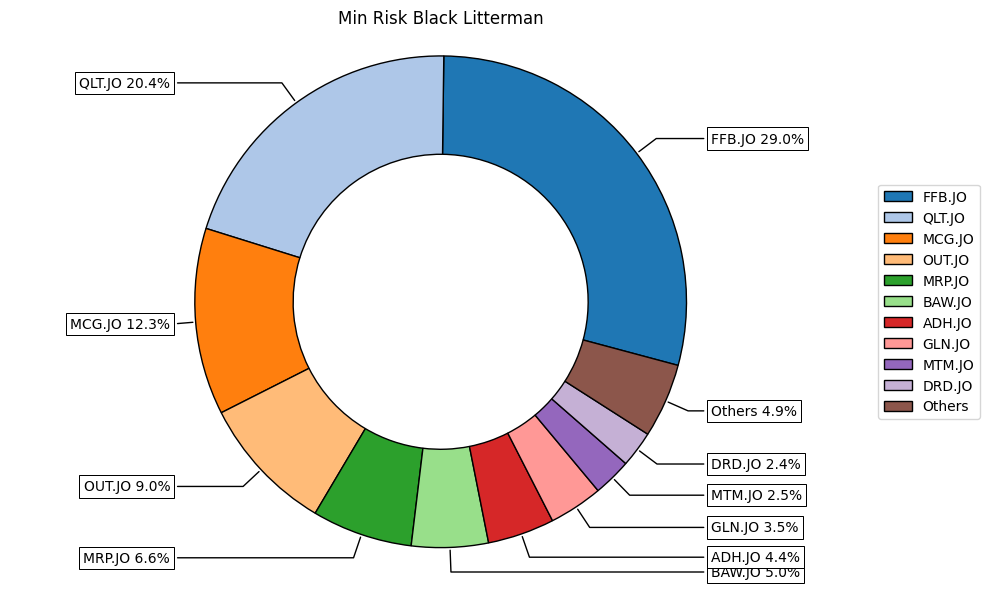

In [10]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_bl, title='Min Risk Black Litterman', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

In [11]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,ABG.JO,ADH.JO,AMS.JO,APN.JO,ARI.JO,AVI.JO,BAW.JO,CLS.JO,DRD.JO,DSY.JO,...,RNI.JO,SAP.JO,SOL.JO,SPP.JO,SSW.JO,TBS.JO,TFG.JO,TRU.JO,VOD.JO,WHL.JO
0,0.0000%,7.9157%,0.0000%,0.3719%,0.0000%,7.5968%,2.4554%,0.0000%,3.3350%,0.0000%,...,10.3878%,0.0000%,0.0000%,1.1192%,0.0000%,0.8163%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,6.6782%,0.0000%,0.0000%,0.0000%,4.2941%,3.6846%,0.0000%,2.9419%,0.0000%,...,6.6057%,0.0000%,0.0000%,0.0000%,0.0000%,1.3508%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,5.9004%,0.0000%,0.0000%,0.0000%,2.4025%,4.2244%,0.0000%,2.7411%,0.0000%,...,4.9949%,0.0000%,0.0000%,0.0000%,0.0000%,1.4034%,0.0000%,0.0000%,0.0000%,0.0000%
3,0.0000%,5.3061%,0.0000%,0.0000%,0.0000%,0.8672%,4.6207%,0.0000%,2.5868%,0.0000%,...,3.5968%,0.0000%,0.0000%,0.0000%,0.0000%,1.3630%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,4.7205%,0.0000%,0.0000%,0.0000%,0.0000%,4.9416%,0.0000%,2.4453%,0.0000%,...,2.2865%,0.0000%,0.0000%,0.0000%,0.0000%,1.1756%,0.0000%,0.0000%,0.0000%,0.0000%


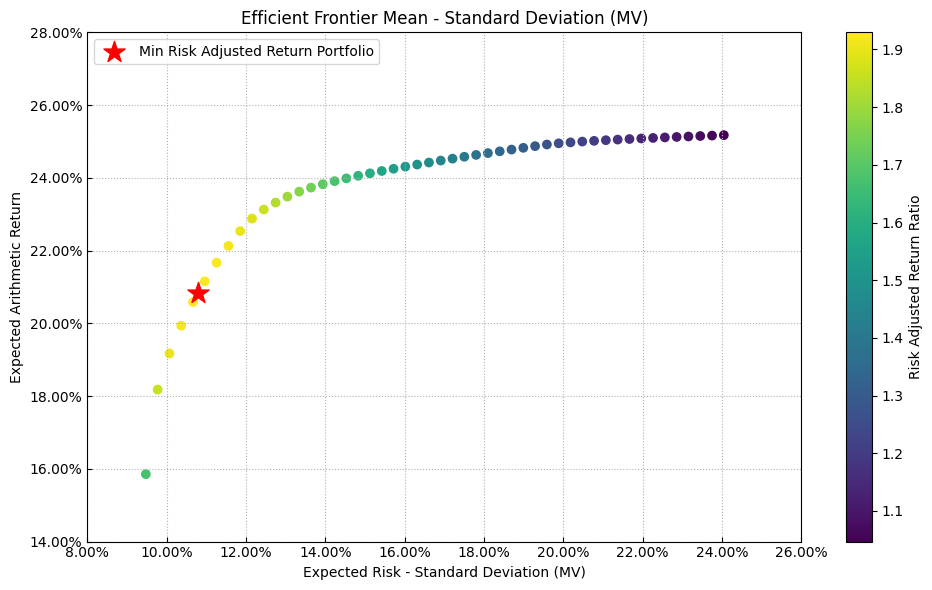

In [12]:
# Plotting the efficient frontier

label = 'Min Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_bl, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

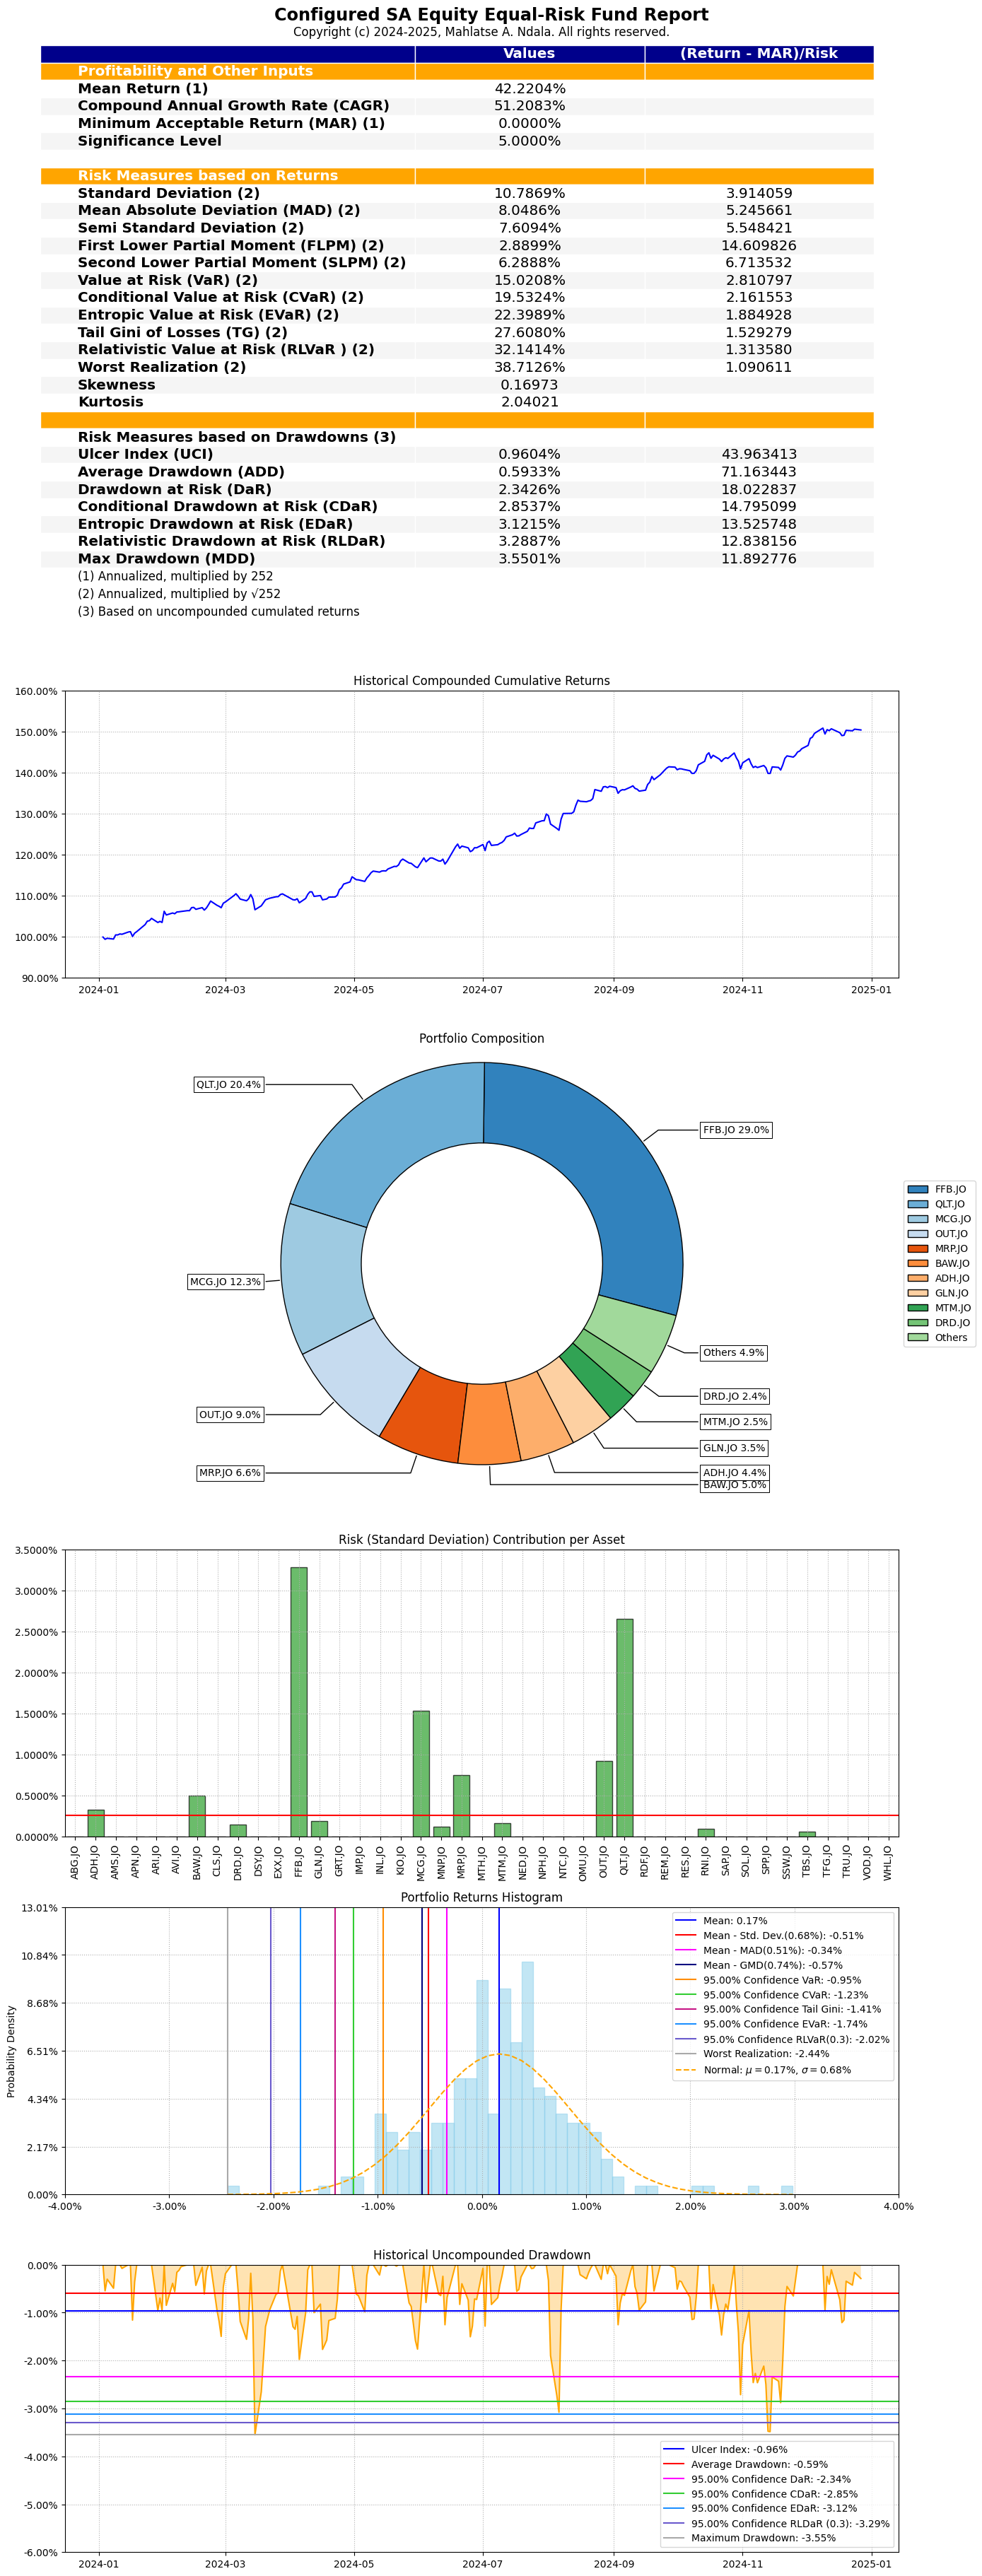

In [13]:
import matplotlib.pyplot as plt

ax = rp.jupyter_report(returns, w=w_bl, rm=rm, t_factor = 252, days_per_year = 365)
plt.show()